In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [62]:
class Mahmoud:
    def read(filePath):
        '''
        Read a file from the specified path and return a DataFrame.

        Parameters:
        filePath : str
            The path to the file to be read.

        Returns:
        DataFrame or None:
            A DataFrame containing the data from the file if successfully read, otherwise None.

        Notes:
        - The function automatically detects the file format based on the file extension (.csv, .xlsx, .xls, .json).
        - Supported file formats include CSV, Excel, and JSON.
        - If the file extension is not supported, it prints a message listing the supported formats and returns None.
        - If the file path or extension is incorrect, it prints an error message and returns None.

        Example:
        >>> df = read('data.csv')
        '''
        try:
            extension = filePath.split('.')[1]

            if extension == 'csv':
                readedFile = pd.read_csv(filePath)
            elif extension == 'xlsx' or extension == '.xls':
                readedFile = pd.read_excel(filePath)
            elif extension == 'json':
                readedFile = pd.read_json(filePath)
            else:
                print('Unsupported File Format')
                print('Supported formats:')
                print('1. CSV')
                print('2. Excel')
                print('3. JSON')
                return None

            return readedFile

        except IndexError:
            print('Please check you provided a correct extension format or correct path')
            return None

        except Exception as e:
            print(f'Error reading file: {e}')
            return None

    def average(df, column=None):
        '''
        Calculate the average of a specified column or of all numeric columns in a DataFrame.

        Parameters:
        df : DataFrame
            The DataFrame containing the data.

        column : str, optional
            The name of the column for which to calculate the average. If not provided, the average of all numeric columns in the DataFrame will be calculated.

        Returns:
        float or list or None:
            If a column name is provided, returns the average value of that column. If no column name is provided, returns a list of average values for all numeric columns in the DataFrame. If an error occurs, returns None.

        Notes:
        - If a column name is provided, the function calculates the average value of the specified column after filling missing values with zeros.
        - If no column name is provided, the function calculates the average value of all numeric columns in the DataFrame after filling missing values with zeros.
        - If the provided column name is not found in the DataFrame, it prints an error message.
        - If the DataFrame does not contain any numeric columns, it prints an error message.

        Example:
        >>> avg = average(df, 'Column1')
        >>> print(avg)
        Average of Column1: 5.2

        >>> avg_list = average(df)
        >>> print(avg_list)
        {'Column1': 5.2, 'Column2': 3.8, 'Column3': 7.1}
        '''
        try:
            if column is not None:
                column_data = df[column].fillna(0)
                average_value = np.average(column_data)
                if not any(f in locals() or f in globals() for f in ('_frame', 'result', 'column_data', 'average_value')):
                    print(f'Average of {column}: {average_value}')
                return average_value
            else:
                numeric_columns = df.select_dtypes(include='number').columns
                averages = {col: np.average(df[col].fillna(0)) for col in numeric_columns}
                if not any(f in locals() or f in globals() for f in ('_frame', 'result', 'column_data', 'average_value')):
                    print(averages)
                return list(averages.values())
        except TypeError:
            print('Error: Please enter a valid column name or provide a DataFrame with numeric columns.')
            return None
        except Exception as e:
            print(f'Column {e} not found')
            return None

    def find_outliers(df, column=None):
        '''
        Find outliers in a specified column or in all numeric columns of a DataFrame.

        Parameters:
        df : DataFrame
            The DataFrame containing the data.

        column : str, optional
            The name of the column for which to find outliers. If not provided, outliers in all numeric columns of the DataFrame will be found.

        Returns:
        dict or None:
            If a column name is provided, returns a dictionary with the column name as key and a list of outliers as values. If no column name is provided, returns a dictionary with column names as keys and lists of outliers as values for all numeric columns in the DataFrame. If an error occurs, returns None.

        Notes:
        - Outliers are detected using the interquartile range (IQR) method.
        - If a column name is provided, the function calculates outliers for the specified column.
        - If no column name is provided, the function calculates outliers for all numeric columns in the DataFrame.
        - Outliers are values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
        - If no outliers are found for a column, it is not included in the output dictionary.

        Example:
        >>> outliers = find_outliers(df, 'Column1')
        >>> print(outliers)
        {'Column1': [100, 150, 200]}

        >>> all_outliers = find_outliers(df)
        >>> print(all_outliers)
        {'Column1': [100, 150, 200], 'Column2': [300, 350], 'Column3': [400]}
        '''
        try:
            if column is not None:
                data = df[column]
                Q1 = np.nanpercentile(data, 25)
                Q3 = np.nanpercentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                outliers = list(data[(data < lower_bound) | (data > upper_bound)].values)
                return {column: outliers}
            else:
                numeric_columns = df.select_dtypes(include='number').columns
                all_outliers = {}
                for col in numeric_columns:
                    data = df[col]
                    Q1 = np.nanpercentile(data, 25)
                    Q3 = np.nanpercentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    outliers = list(data[(data < lower_bound) | (data > upper_bound)].values)
                    if outliers:
                        all_outliers[col] = outliers
                return all_outliers
        except Exception as e:
            print(f'Error: {e}')
            return None

    def most_frequent_value(df, column=None):
        '''
        Find the most frequent value in a specified column or in all columns of a DataFrame.

        Parameters:
        df : DataFrame
            The DataFrame containing the data.

        column : str, optional
            The name of the column for which to find the most frequent value. If not provided, the most frequent value for each column in the DataFrame will be found.

        Returns:
        str or dict or None:
            If a column name is provided, returns the most frequent value of that column. If no column name is provided, returns a dictionary with column names as keys and their respective most frequent values as values. If an error occurs, returns None.

        Notes:
        - If a column name is provided, the function calculates the most frequent value for the specified column.
        - If no column name is provided, the function calculates the most frequent value for each column in the DataFrame.
        - If all values in a column are unique, the function prints a message indicating no frequent value found for that column.
        - If no columns with unique values are found, the function prints a message indicating no columns with unique values found.

        Example:
        >>> most_freq = most_frequent_value(df, 'Column1')
        >>> print(most_freq)
        Most frequent value in 'Column1': 5

        >>> all_most_freq = most_frequent_value(df)
        >>> print(all_most_freq)
        {'Column1': 5, 'Column2': 'A', 'Column3': 10}
        '''
        try:
            if column is not None:
                if df[column].nunique() == len(df[column]):
                    print(f"All values in '{column}' are unique. No frequent value found.")
                    return None
                else:
                    most_frequent = df[column].mode().iloc[0]
                    print(f"Most frequent value in '{column}': {most_frequent}")
                    return most_frequent
            else:
                all_most_frequent = {}
                for col in df.columns:
                    if df[col].nunique() > 0:
                        if df[col].nunique() == len(df[col]):
                            pass
                        else:
                            most_frequent = df[col].mode().iloc[0]
                            all_most_frequent[col] = most_frequent
                if all_most_frequent:
                    print("Most frequent values for each column:")
                    for col, value in all_most_frequent.items():
                        print(f"{col}: {value}")
                    return all_most_frequent
                else:
                    print("No columns with unique values found.")
                    return None
        except Exception as e:
            print(f'Error: {e}')
            return None

    def standard_deviation (df , column = None):
        '''
        Calculate the standard deviation of values in a specified column or in all numeric columns of a DataFrame.

        Parameters:
        df : DataFrame
            The DataFrame containing the data.

        column : str, optional
            The name of the column for which to calculate the standard deviation. If not provided, the standard deviation for all numeric columns of the DataFrame will be calculated.

        Returns:
        float or dict or None:
            If a column name is provided, returns the standard deviation of that column. If no column name is provided, returns a dictionary with column names as keys and their respective standard deviations as values. If an error occurs, returns None.

        Notes:
        - If a column name is provided, the function calculates the standard deviation for the specified column.
        - If no column name is provided, the function calculates the standard deviation for all numeric columns in the DataFrame.

        Example:
        >>> std_dev = standard_deviation(df, 'Column1')
        >>> print(std_dev)
        10.5

        >>> all_std_dev = standard_deviation(df)
        >>> print(all_std_dev)
        {'Column1': 10.5, 'Column2': 15.3, 'Column3': 20.1}
        '''
        try:
            if column is not None:
                return np.std(df[column])
            else:
                numeric_columns = df.select_dtypes(include='number').columns
                result = {}
                for col in numeric_columns:
                    result[col] = np.std(df[col])
                return result
        except TypeError:
            print('Plaese enter at least one numeric column')
            return None
        except Exception as e:
            print(f'Error: {e}')
            return None

    def fill_missing_values(df, method=None, value=None, column=None, interpolate=False):
        '''
        Fill missing (NaN) values in a DataFrame using specified methods or values.

        Parameters:
        df : DataFrame
            The DataFrame containing the data.
        method : str, optional
            The method to fill missing values. Options are 'forward' or 'backward'.
        value : scalar, optional
            The value to fill missing values with.
        column : str, optional
            The name of the column for which to fill missing values. If provided, only the specified column will be processed.
        interpolate : bool, optional
            If True, missing values will be interpolated before filling with the specified method. Default is False.

        Returns:
        DataFrame:
            A DataFrame with missing values filled according to the specified method or value.

        Notes:
        - If both method and value are provided, method will take precedence.
        - If neither method nor value are provided, and interpolate is False, missing values will be filled with the last valid observation.
        - If neither method nor value are provided, and interpolate is True, missing values will be linearly interpolated before filling with the last valid observation.

        Example:
        >>> filled_df = fill_missing_values(df, method='forward')
        >>> print(filled_df)

        >>> filled_df = fill_missing_values(df, value=0, interpolate=True)
        >>> print(filled_df)
        '''
        try:
            forw = None

            if method is not None:
                if method == 'forward':
                    forw = True
                elif method == 'backward':
                    forw = False
                else:
                    print('Please enter a valid method: forward or backward')
                    return            

            if column is not None and method is None:
                if value is None:
                    print('Please Enter a value')
                else:
                    df[column].fillna(value, inplace=True)
            elif column is not None and method is not None:
                if forw:
                    df[column].fillna(method='ffill', inplace=True)
                else:
                    df[column].fillna(method='bfill', inplace=True)

            elif column is None and method is not None:
                if forw is not None:
                    if forw:
                        df.fillna(method='ffill', inplace=True)
                    else:
                        df.fillna(method='bfill', inplace=True)
                else:
                    print("Please specify either 'forward' or 'backward' method.")
                    return

            else:
                if value is not None:
                    df.fillna(value, inplace=True)
                else:
                    if interpolate:
                        df.interpolate(inplace=True)
                        df.fillna(method='ffill', inplace=True)
                    else:
                        print("Please specify either a 'value' or set 'interpolate' to True.")
                        return

            if interpolate:
                df.interpolate(inplace=True)

            return df

        except Exception as e:
            print(f'Error: {e}')


    def graph(df, columns=[], graph_format='plot', shape=''):
        '''
        Plot numeric columns of a DataFrame against each other.

        Parameters:
        df : DataFrame
            The DataFrame containing the data to be plotted.

        columns : list, optional
            A list of column names to be plotted. If not provided, all numeric columns in the DataFrame will be plotted against each other.

        graph_format : {'plot', 'scatter'}, optional
            The format of the plot. Default is 'plot'. Options are 'plot' for line plot and 'scatter' for scatter plot.

        shape : str, optional
            Marker style for scatter plot. Default is an empty string, which will use the default marker ('o').

        Returns:
        None

        Notes:
        - If only one column name is provided, it prints a message asking for two column names or none.
        - If no columns are provided and there are less than two numeric columns in the DataFrame, it prints a message indicating that there are not enough numeric columns to plot.
        - If non-numeric column names are provided, it prints a message listing those columns and asks for numeric column names.
        - The plot displays each numeric column of the DataFrame against the first numeric column.
        - The colors of the plotted lines/scatter points cycle through a list of colors.

        Example:
        >>> graph(df, columns=['Column1', 'Column2'], graph_format='plot', shape='o')
        '''
        colors = ['black', 'red', 'blue', 'yellow', 'green']
        try:
            if len(columns) == 1:
                print("Please provide two column names or none.")
                return
            elif not columns:
                numeric_columns = df.select_dtypes(include='number').columns
                if len(numeric_columns) < 2:
                    print("Not enough numeric columns to plot. Provide at least two specific column names.")
                    return
            else:
                non_numeric_columns = [col for col in columns if col not in df.select_dtypes(include='number').columns]
                if non_numeric_columns:
                    print(f"The following columns are not numeric: {non_numeric_columns}. Provide numeric column names.")
                    return None
                else:
                    numeric_columns = columns


            first_column = numeric_columns[0]

            for i, other_column in enumerate(numeric_columns[1:]):
                if graph_format == 'scatter':
                    if not shape:
                        shape = 'o'
                    plt.scatter(df[first_column], df[other_column], marker=shape, label=f'{first_column} vs {other_column}', color=colors[i % len(colors)])
                elif graph_format == 'plot':
                    plt.plot(df[first_column], df[other_column], shape, label=f'{first_column} vs {other_column}', color=colors[i % len(colors)])
                else:
                    print("Invalid graph format. Please choose 'scatter' or 'plot'.")
                    return

            plt.xlabel(first_column)
            plt.ylabel("Y-axis")
            plt.legend()
            plt.title(f'{graph_format.capitalize()} Plot of Numeric Columns against {first_column}')
            plt.show()
        except Exception as e:
            print(f'Error: {e}')
            return None


    def label_encode(df, column):
        '''
        Encode categorical column using LabelEncoder and print a mapping between original labels and encoded values.

        Parameters:
        df : DataFrame
            The DataFrame containing the data.

        column : str
            The name of the categorical column to be encoded.

        Returns:
        DataFrame or None:
            Returns the DataFrame with the categorical column encoded. If an error occurs or the column is not found, returns None.

        Notes:
        - The function encodes the specified categorical column using LabelEncoder.
        - It prints a mapping between the original labels and their encoded values.
        - If the specified column is not found in the DataFrame or if it's a numeric column, the function prints an appropriate error message and returns None.

        Example:
        >>> encoded_df = label_encode(df, 'Category')
        Mapping between original labels and encoded values:
        {'A': 0, 'B': 1, 'C': 2}

        >>> print(encoded_df.head())
           Column1  Column2  Encoded_Category
        0        10      5              0
        1         5      8              1
        2         8      7              2
        ...
        '''
        if column not in df.columns:
            print(f'"{column}" is not found in your data frame columns.')
            return None
        elif df[column].dtype in ['int64', 'float64']:
            print("Can not encode a numeric column. Please enter a non-numeric one.")
            return None
        else:
            label = LabelEncoder()
            encodedLabels = label.fit_transform(df[column])
            df = df.drop(column, axis="columns")
            df[column] = encodedLabels
            labelMapping = {label: code for label, code in zip(label.classes_, label.transform(label.classes_))}
            print(labelMapping)
            return df

    def one_hot_encode(df, column):
        '''
        Perform one-hot encoding on a categorical column in the DataFrame.

        Parameters:
        df : DataFrame
            The DataFrame containing the data.

        column : str
            The name of the categorical column to be one-hot encoded.

        Returns:
        DataFrame or None:
            Returns the DataFrame with the specified categorical column one-hot encoded. If an error occurs or the column is not found, returns None.

        Notes:
        - The function checks if the specified column is present in the DataFrame and if it's numeric. If not, it performs one-hot encoding using scikit-learn's OneHotEncoder.
        - It prints appropriate error messages if the column is not found or if it's numeric.
        - The function returns None if the column is not found or if an error occurs during one-hot encoding.

        Example:
        >>> encoded_df = one_hot_encode(df, 'Category')
        >>> print(encoded_df.head())
           Column1  Column2  Encoded_Category_A  Encoded_Category_B  Encoded_Category_C
        0        10      5                   1                   0                   0
        1         5      8                   0                   1                   0
        2         8      7                   0                   0                   1
        ...
        '''
        if column not in df.columns:
            print(f'"{column}" is not found in your data frame columns.')
            return None
        elif df[column].dtype in ['int64', 'float64']:
            print("Can not encode a numeric column. Please enter a non-numeric one.")
            return None
        else:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
            oheEncoded = ohe.fit_transform(df[[column]])
            new_df = pd.concat([df,oheEncoded], axis=1).drop(columns=[column])
            return new_df

In [22]:
# Read Function
df = Mahmoud.read('new_data.csv')
print("initial data frame:")
df

initial data frame:


,Profit,Profit Margin,Difference,State,Country,Cities,Gender
0,28777,8633,20144,Lose,Egypt,1.0,M
1,30150,9045,21105,Lose,ENG,2.0,F
2,89435,26830,62605,Win,USA,23.0,M
3,54719,16416,38303,Win,SA,3.0,F
4,58458,17537,40921,Win,PL,35.0,M
5,80353,24106,56247,Win,Egypt,2.0,F
6,71474,21442,50032,Win,PL,4.0,M
7,50014,15004,35010,Win,PL,32.0,F
8,39303,11791,27512,Lose,Egypt,32.0,M
9,99297,29789,69508,Win,Egypt,24.0,F


In [29]:
# Average function
avg_profit = Mahmoud.average(df, 'Profit')
avg = Mahmoud.average(df)

Average of Profit: 67128.35
{'Profit': 67128.35, 'Profit Margin': 20138.45, 'Difference': 46989.9, 'Cities': 81.05}


In [35]:
# Outliers function
# Case 1: When a specific column is provided
outliers_column1 = Mahmoud.find_outliers(df, 'Profit')
print("Outliers in 'Profit' column:")
print(outliers_column1)

# Case 2: When no column is provided
all_outliers = Mahmoud.find_outliers(df)
print("Outliers in all numeric columns:")
print(all_outliers)

# Case 3: Handling scenarios with an empty DataFrame
empty_df = pd.DataFrame()
empty_outliers = Mahmoud.find_outliers(empty_df)
print("Outliers in empty DataFrame:")
print(empty_outliers)

# Case 3: Handling scenarios where the specified column does not exist in the DataFrame
nonexistent_column_outliers = Mahmoud.find_outliers(df, 'Nonexistent_Column')
print("Outliers for nonexistent column:")
print(nonexistent_column_outliers)

# Case 3: Handling scenarios where the DataFrame contains non-numeric columns
non_numeric_outliers = Mahmoud.find_outliers(df)
print("Outliers when DataFrame contains non-numeric columns:")
print(non_numeric_outliers)

Outliers in 'Profit' column:
{'Profit': []}
Outliers in all numeric columns:
{'Cities': [532.0, 324.0, 324.0]}
Outliers in empty DataFrame:
{}
Error: 'Nonexistent_Column'
Outliers for nonexistent column:
None
Outliers when DataFrame contains non-numeric columns:
{'Cities': [532.0, 324.0, 324.0]}


In [43]:
# most_frequent_value function
# Case 1: When a specific column is provided
most_freq_profit = Mahmoud.most_frequent_value(df, 'Country')

# Case 2: When no column is provided
all_most_freq = Mahmoud.most_frequent_value(df)

# Case 3: Handling scenarios with an empty DataFrame
empty_df = pd.DataFrame()
empty_most_freq = Mahmoud.most_frequent_value(empty_df)

# Case 4: Handling scenarios where the specified column does not exist in the DataFrame
nonexistent_column_most_freq = Mahmoud.most_frequent_value(df, 'Nonexistent_Profit')

# Case 5: Handling scenarios where all values in a column are unique
unique_values_df = pd.DataFrame({'Profit': [1, 2, 3]})
unique_most_freq = Mahmoud.most_frequent_value(unique_values_df, 'Profit')

Most frequent value in 'Country': Egypt
Most frequent values for each column:
State: Win
Country: Egypt
Cities: 32.0
Gender: F
No columns with unique values found.
Error: 'Nonexistent_Profit'
All values in 'Profit' are unique. No frequent value found.


In [46]:
# standard_deviation function
# Case 1: When a specific column is provided
std_dev_profit = Mahmoud.standard_deviation(df, 'Profit')
print(f"Standard deviation of 'Profit' column: {std_dev_profit}")

# Case 2: When no column is provided
all_std_dev = Mahmoud.standard_deviation(df)
print("Standard deviation for each column:")
print(all_std_dev)

# Case 3: Handling scenarios with an empty DataFrame
empty_df = pd.DataFrame()
empty_std_dev = Mahmoud.standard_deviation(empty_df)
print(f"Standard deviation in empty DataFrame: {empty_std_dev}")

# Case 4: Handling scenarios where the specified column does not exist in the DataFrame
nonexistent_column_std_dev = Mahmoud.standard_deviation(df, 'Nonexistent_Profit')
print(f"Standard deviation for nonexistent column: {nonexistent_column_std_dev}")

# Case 5: Handling scenarios where the DataFrame contains non-numeric columns
non_numeric_df = pd.DataFrame({'Country': ['USA', 'UK', 'Canada']})
non_numeric_std_dev = Mahmoud.standard_deviation(non_numeric_df)
print(f"Standard deviation for non-numeric DataFrame: {non_numeric_std_dev}")

Standard deviation of 'Profit' column: 24701.114428857258
Standard deviation for each column:
{'Profit': 24701.114428857258, 'Profit Margin': 7410.3970168608375, 'Difference': 17290.717419760233, 'Cities': 140.59761644740823}
Standard deviation in empty DataFrame: {}
Error: 'Nonexistent_Profit'
Standard deviation for nonexistent column: None
Standard deviation for non-numeric DataFrame: {}


In [50]:
# fill_missing_values function
# Case 1: Filling missing values using the forward method for the entire DataFrame
filled_df_forward = Mahmoud.fill_missing_values(df, method='forward')
print("Filled DataFrame using forward method:")
print(filled_df_forward)

# Case 2: Filling missing values using the backward method for a specific column
filled_column_backward = Mahmoud.fill_missing_values(df, method='backward', column='Profit')
print("Filled 'Profit' column using backward method:")
print(filled_column_backward)

# Case 3: Filling missing values using a specified value for a specific column
filled_column_value = Mahmoud.fill_missing_values(df, value=0, column='Profit')
print("Filled 'Profit' column using specified value:")
print(filled_column_value)

# Case 4: Filling missing values using interpolation and forward method for the entire DataFrame
filled_df_interpolate = Mahmoud.fill_missing_values(df, interpolate=True, method='forward')
print("Filled DataFrame using interpolation and forward method:")
print(filled_df_interpolate)

# Case 5: Filling missing values using interpolation and specified value for the entire DataFrame
filled_df_interpolate_value = Mahmoud.fill_missing_values(df, interpolate=True, value=0)
print("Filled DataFrame using interpolation and specified value:")
print(filled_df_interpolate_value)

# Case 6: Filling missing values using interpolation without specifying method or value
filled_df_interpolate_default = Mahmoud.fill_missing_values(df, interpolate=True)
print("Filled DataFrame using interpolation and default method (ffill):")
print(filled_df_interpolate_default)

# Case 7: Handling scenarios with an empty DataFrame
empty_df = pd.DataFrame()
empty_filled_df = Mahmoud.fill_missing_values(empty_df, method='forward')
print("Filled empty DataFrame:")
print(empty_filled_df)

# Case 8: Handling scenarios where the specified column does not exist in the DataFrame
nonexistent_column_filled = Mahmoud.fill_missing_values(df, method='forward', column='Nonexistent_Column')
print("Filled nonexistent column:")
print(nonexistent_column_filled)

# Case 9: Handling scenarios where no method or value is provided and interpolate is False
no_method_value_filled = Mahmoud.fill_missing_values(df)
print("Filled DataFrame without specifying method or value:")
print(no_method_value_filled)

# Case 10: Handling scenarios where no method or value is provided and interpolate is True
no_method_value_interpolate_filled = Mahmoud.fill_missing_values(df, interpolate=True)
print("Filled DataFrame with interpolation without specifying method or value:")
print(no_method_value_interpolate_filled)

# Case 11: Handling scenarios where both method and value are provided
method_and_value_filled = Mahmoud.fill_missing_values(df, method='forward', value=0)
print("Filled DataFrame with both method and value specified:")
print(method_and_value_filled)

Filled DataFrame using forward method:
    Profit  Profit Margin  Difference State Country  Cities Gender
0    28777           8633       20144  Lose   Egypt     1.0      M
1    30150           9045       21105  Lose     ENG     2.0      F
2    89435          26830       62605   Win     USA    23.0      M
3    54719          16416       38303   Win      SA     3.0      F
4    58458          17537       40921   Win      PL    35.0      M
5    80353          24106       56247   Win   Egypt     2.0      F
6    71474          21442       50032   Win      PL     4.0      M
7    50014          15004       35010   Win      PL    32.0      F
8    39303          11791       27512  Lose   Egypt    32.0      M
9    99297          29789       69508   Win   Egypt    24.0      F
10   81865          24560       57305   Win      SA    32.0      M
11  102735          30820       71915   Win      SA     3.0      F
12   49291          14787       34504   Win     USA   532.0      M
13   97886          293

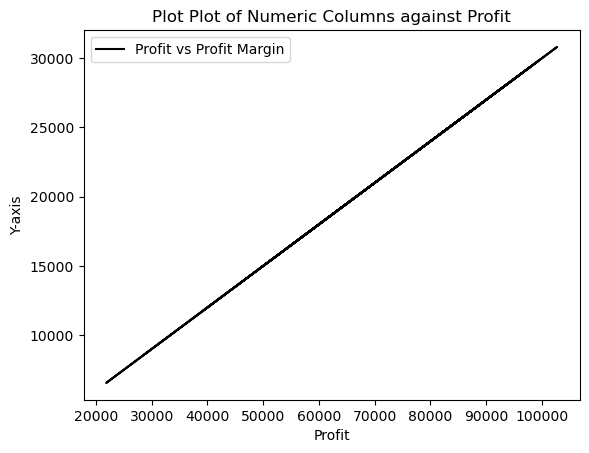

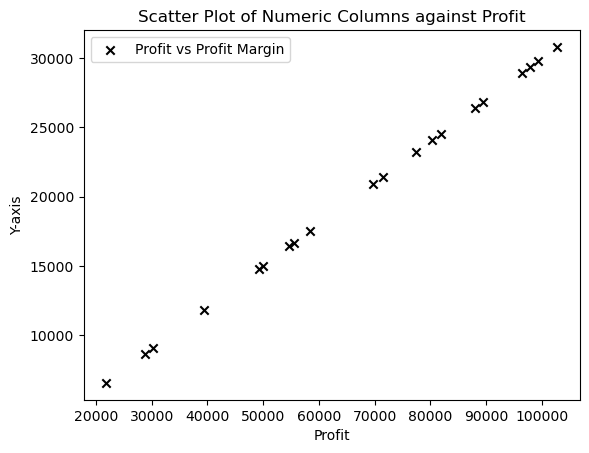

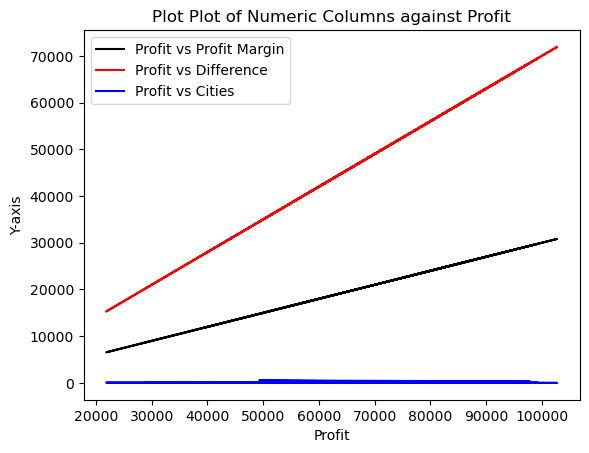

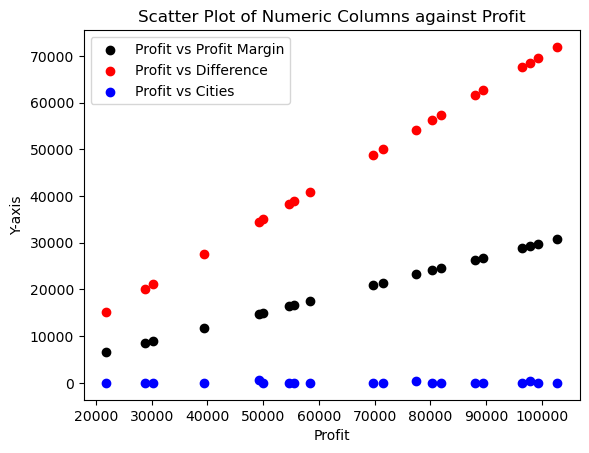

Please provide two column names or none.


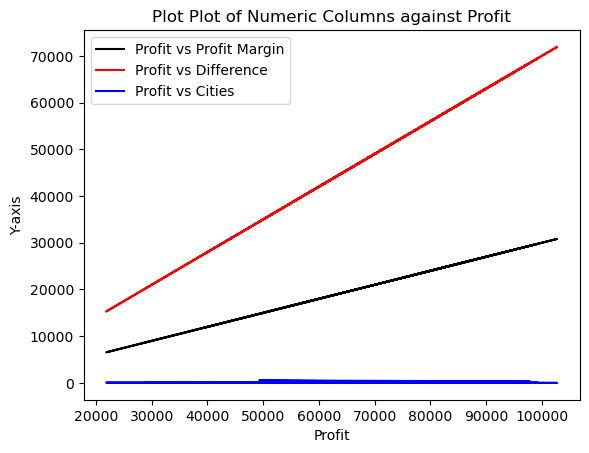

The following columns are not numeric: ['Country']. Provide numeric column names.
Invalid graph format. Please choose 'scatter' or 'plot'.
Not enough numeric columns to plot. Provide at least two specific column names.
Not enough numeric columns to plot. Provide at least two specific column names.


In [51]:
# graph function
# Case 1: Plotting specified numeric columns using line plot format
Mahmoud.graph(df, columns=['Profit', 'Profit Margin'])

# Case 2: Plotting specified numeric columns using scatter plot format with custom marker style
Mahmoud.graph(df, columns=['Profit', 'Profit Margin'], graph_format='scatter', shape='x')

# Case 3: Plotting all numeric columns against each other using line plot format
Mahmoud.graph(df)

# Case 4: Plotting all numeric columns against each other using scatter plot format
Mahmoud.graph(df, graph_format='scatter')

# Case 5: Handling scenario where only one column name is provided
Mahmoud.graph(df, columns=['Profit'])

# Case 6: Handling scenario where no columns are provided and there are not enough numeric columns to plot
Mahmoud.graph(df.drop(columns=['Country']))

# Case 7: Handling scenario where non-numeric column names are provided
Mahmoud.graph(df, columns=['Country', 'Profit'])

# Case 8: Handling scenario where an invalid graph format is provided
Mahmoud.graph(df, columns=['Profit', 'Profit Margin'], graph_format='invalid')

# Case 9: Handling scenario where an empty DataFrame is provided
empty_df = pd.DataFrame()
Mahmoud.graph(empty_df)

# Case 10: Handling scenario where there are no numeric columns in the DataFrame
Mahmoud.graph(df[['Country']])


In [65]:
# label_encode function
# Case 1: Encoding a categorical column and printing the mapping between original labels and encoded values
encoded_df = Mahmoud.label_encode(df, 'Country')
print(encoded_df)

# Case 2: Encoding a categorical column that is not found in the DataFrame
Mahmoud.label_encode(df, 'Region')

# Case 3: Encoding a numeric column
Mahmoud.label_encode(df, 'Profit')

{'ENG': 0, 'Egypt': 1, 'PL': 2, 'SA': 3, 'USA': 4}
    Profit  Profit Margin  Difference State  Cities Gender  Country
0    28777           8633       20144  Lose     1.0      M        1
1    30150           9045       21105  Lose     2.0      F        0
2    89435          26830       62605   Win    23.0      M        4
3    54719          16416       38303   Win     3.0      F        3
4    58458          17537       40921   Win    35.0      M        2
5    80353          24106       56247   Win     2.0      F        1
6    71474          21442       50032   Win     4.0      M        2
7    50014          15004       35010   Win    32.0      F        2
8    39303          11791       27512  Lose    32.0      M        1
9    99297          29789       69508   Win    24.0      F        1
10   81865          24560       57305   Win    32.0      M        3
11  102735          30820       71915   Win     3.0      F        3
12   49291          14787       34504   Win   532.0      M       

In [64]:
# Example of using the one_hot_encode function
# Case 1: Encoding a categorical column and printing the mapping between original labels and encoded values
encoded_df = Mahmoud.one_hot_encode(df, 'Country')
print(encoded_df)

# Case 2: Encoding a categorical column that is not found in the DataFrame
Mahmoud.one_hot_encode(df, 'Region')

# Case 3: Encoding a numeric column
Mahmoud.one_hot_encode(df, 'Profit')

    Profit  Profit Margin  Difference State  Cities Gender  Country_ENG  \
0    28777           8633       20144  Lose     1.0      M          0.0   
1    30150           9045       21105  Lose     2.0      F          1.0   
2    89435          26830       62605   Win    23.0      M          0.0   
3    54719          16416       38303   Win     3.0      F          0.0   
4    58458          17537       40921   Win    35.0      M          0.0   
5    80353          24106       56247   Win     2.0      F          0.0   
6    71474          21442       50032   Win     4.0      M          0.0   
7    50014          15004       35010   Win    32.0      F          0.0   
8    39303          11791       27512  Lose    32.0      M          0.0   
9    99297          29789       69508   Win    24.0      F          0.0   
10   81865          24560       57305   Win    32.0      M          0.0   
11  102735          30820       71915   Win     3.0      F          0.0   
12   49291          14787